In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
habermansData = pd.read_csv("haberman.csv",names = ["Age","Op_Year","Axil_Nodes","Surv_Status"])
warnings.filterwarnings("ignore")

In [2]:
print(habermansData.shape)

(306, 4)


In [3]:
print(habermansData.columns)

Index(['Age', 'Op_Year', 'Axil_Nodes', 'Surv_Status'], dtype='object')


In [4]:
print(habermansData['Surv_Status'].value_counts())

1    225
2     81
Name: Surv_Status, dtype: int64


In [5]:
print(habermansData.describe())

              Age     Op_Year  Axil_Nodes  Surv_Status
count  306.000000  306.000000  306.000000   306.000000
mean    52.457516   62.852941    4.026144     1.264706
std     10.803452    3.249405    7.189654     0.441899
min     30.000000   58.000000    0.000000     1.000000
25%     44.000000   60.000000    0.000000     1.000000
50%     52.000000   63.000000    1.000000     1.000000
75%     60.750000   65.750000    4.000000     2.000000
max     83.000000   69.000000   52.000000     2.000000


In [6]:
print(habermansData)

     Age  Op_Year  Axil_Nodes  Surv_Status
0     30       64           1            1
1     30       62           3            1
2     30       65           0            1
3     31       59           2            1
4     31       65           4            1
5     33       58          10            1
6     33       60           0            1
7     34       59           0            2
8     34       66           9            2
9     34       58          30            1
10    34       60           1            1
11    34       61          10            1
12    34       67           7            1
13    34       60           0            1
14    35       64          13            1
15    35       63           0            1
16    36       60           1            1
17    36       69           0            1
18    37       60           0            1
19    37       63           0            1
20    37       58           0            1
21    37       59           6            1
22    37   

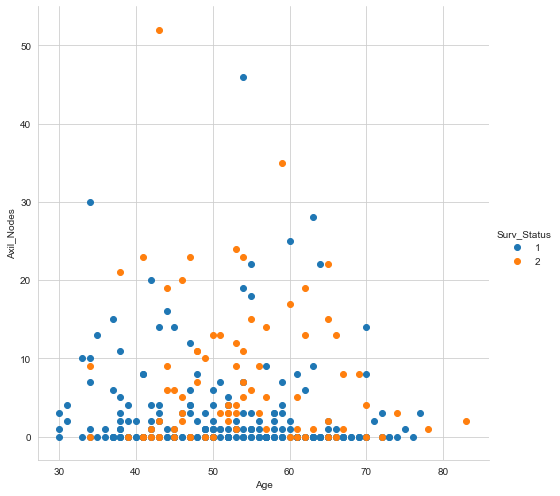

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(habermansData, hue="Surv_Status", size=7) \
   .map(plt.scatter, "Age", "Axil_Nodes") \
   .add_legend();
plt.show();


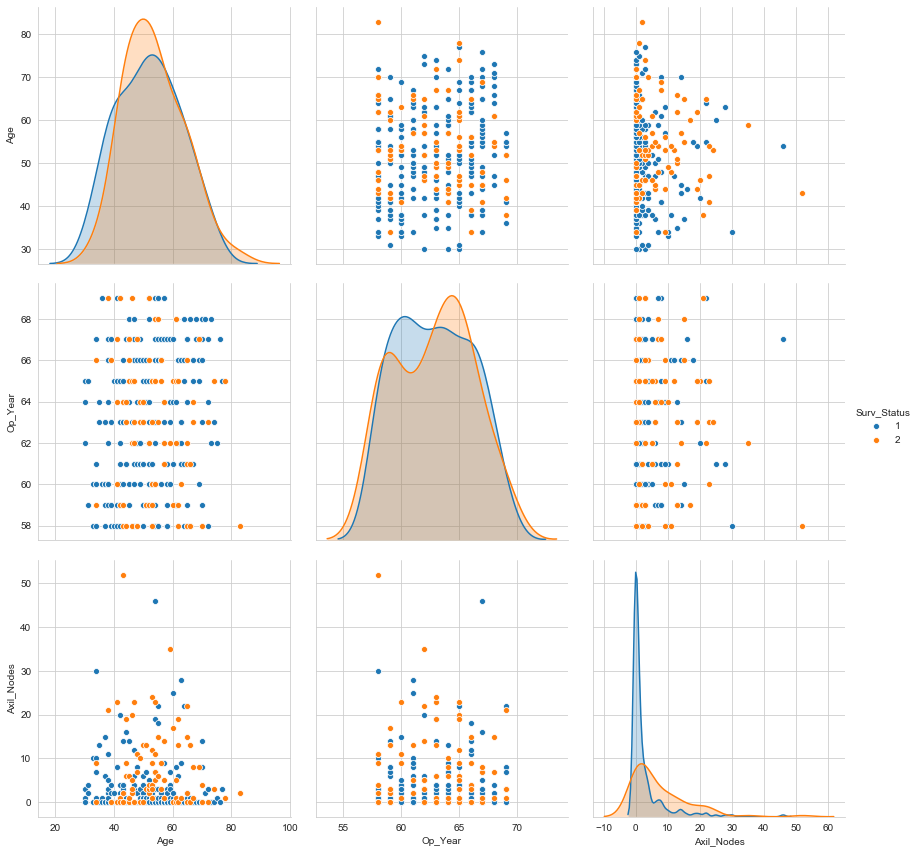

In [22]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(habermansData, hue="Surv_Status", size=4,vars=["Age", "Op_Year", "Axil_Nodes"]);
plt.show()

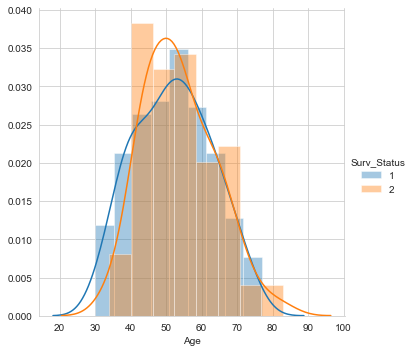

In [16]:
sns.FacetGrid(habermansData, hue="Surv_Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

In [20]:
#From this graph we can just infer that the likelyhood of patients surviving in the early age (below 35) is more compared
#with later ages, as we see the green line above the red one. Also, the likelyhood of deaths drastically increased in the 
#age group (42 - 62). After that the matter of life and death have almost equal probability. 
#In the later years around(72-73) we see a slight increase in the pdf but no strong conclusion can be drived from that

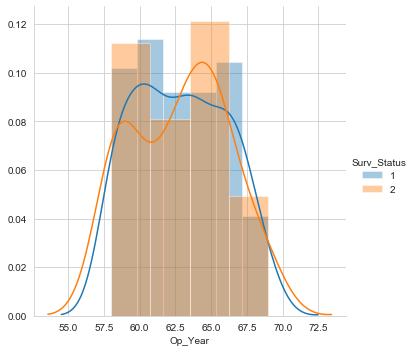

In [23]:
sns.FacetGrid(habermansData, hue="Surv_Status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

From this graph we can conclude that while the likelihood of patients dying of cancer is generally more, throughout the decade, there are just two short periods where more number of people successfully won their battle against cancer. Between the year 1961-mid of 1963, the likelihood of patients surviving the operation increased.

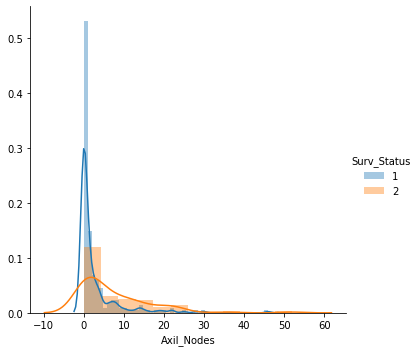

In [8]:
sns.FacetGrid(habermansData, hue="Surv_Status", size=5) \
   .map(sns.distplot, "Axil_Nodes") \
   .add_legend();
plt.show();

It is very clear from the distribution plot above that when the number of axiliairy nodes detected are less than around 2, then there is high likelihood of the patient surviving after the operations. More the nodes, less are the chances of survival.

No handles with labels found to put in legend.


[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


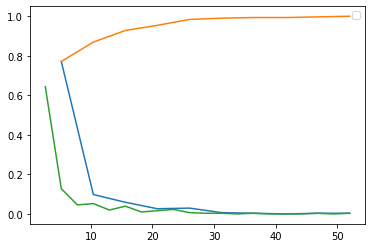

In [10]:
counts, bin_edges = np.histogram(habermansData['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

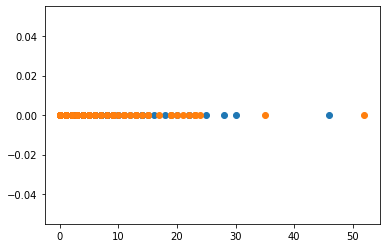

In [5]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
haberman_survived = habermansData.loc[habermansData["Surv_Status"] == 1];
haberman_deceased = habermansData.loc[habermansData["Surv_Status"] == 2];
plt.plot(haberman_survived["Axil_Nodes"], np.zeros_like(haberman_survived['Axil_Nodes']), 'o')
plt.plot(haberman_deceased["Axil_Nodes"], np.zeros_like(haberman_deceased['Axil_Nodes']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


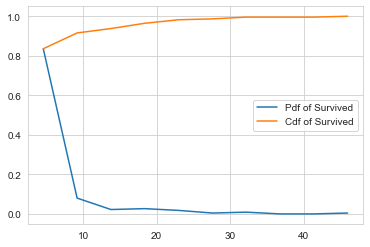

In [17]:
counts, bin_edges = np.histogram(haberman_survived['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
sns.set_style("whitegrid");
plt.plot(bin_edges[1:],pdf,label = 'Pdf of Survived');
plt.plot(bin_edges[1:], cdf,label = 'Cdf of Survived');
plt.legend()
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


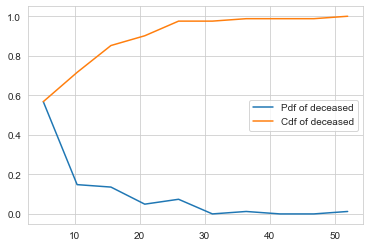

In [18]:
counts, bin_edges = np.histogram(haberman_deceased['Axil_Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
sns.set_style("whitegrid");
plt.plot(bin_edges[1:],pdf,label = 'Pdf of deceased');
plt.plot(bin_edges[1:], cdf,label = 'Cdf of deceased');
plt.legend()
plt.show();

From the above analysis it is clear that out of the 306 people, 225 survived and among them, 90-91% had axilliary nodes detected less than 10, as per the CDF plot of survivors. But again, the CDF plot of deceased shows that more than 70% of the deceased are people having Axil nodes less than or equal to 10. So, clearly this is an overlaping situation, without any clear threshold. However, we can define a threshold to be 4, that any patient having less than 4 detected axil nodes is more likely to be a survivor on the basis of the argument that PDF of survivor is more than that of the deceased in that region.


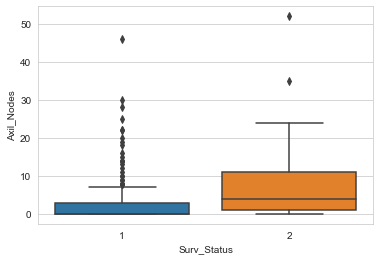

In [19]:
sns.boxplot(x='Surv_Status',y='Axil_Nodes', data=habermansData)
plt.show()

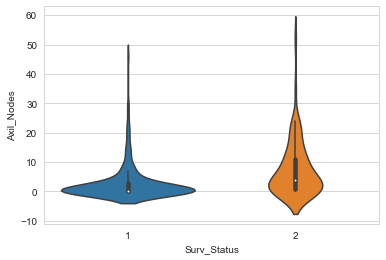

In [20]:
sns.violinplot(x='Surv_Status',y='Axil_Nodes', data=habermansData)
plt.show()

Out of all the analysis above, we can conclude the following things:
- Out of the three features Age, Operation Year and Axillary nodes detect ed, the last one is most helpful in classification 
- Although there are some overlapping regions for this feature to segrega te the two classes but, the most favoured argument is that for a value of detected axillary nodes less than 3, the chances of patient surviving is more, hence we can keep that as the basis of classification.